In [113]:
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import numpy as np
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother
df = pd.read_excel('bu_mi_для оценки.xlsx')
#df = df.query('Region == "Архангельск"')

<AxesSubplot:xlabel='nps', ylabel='Region'>

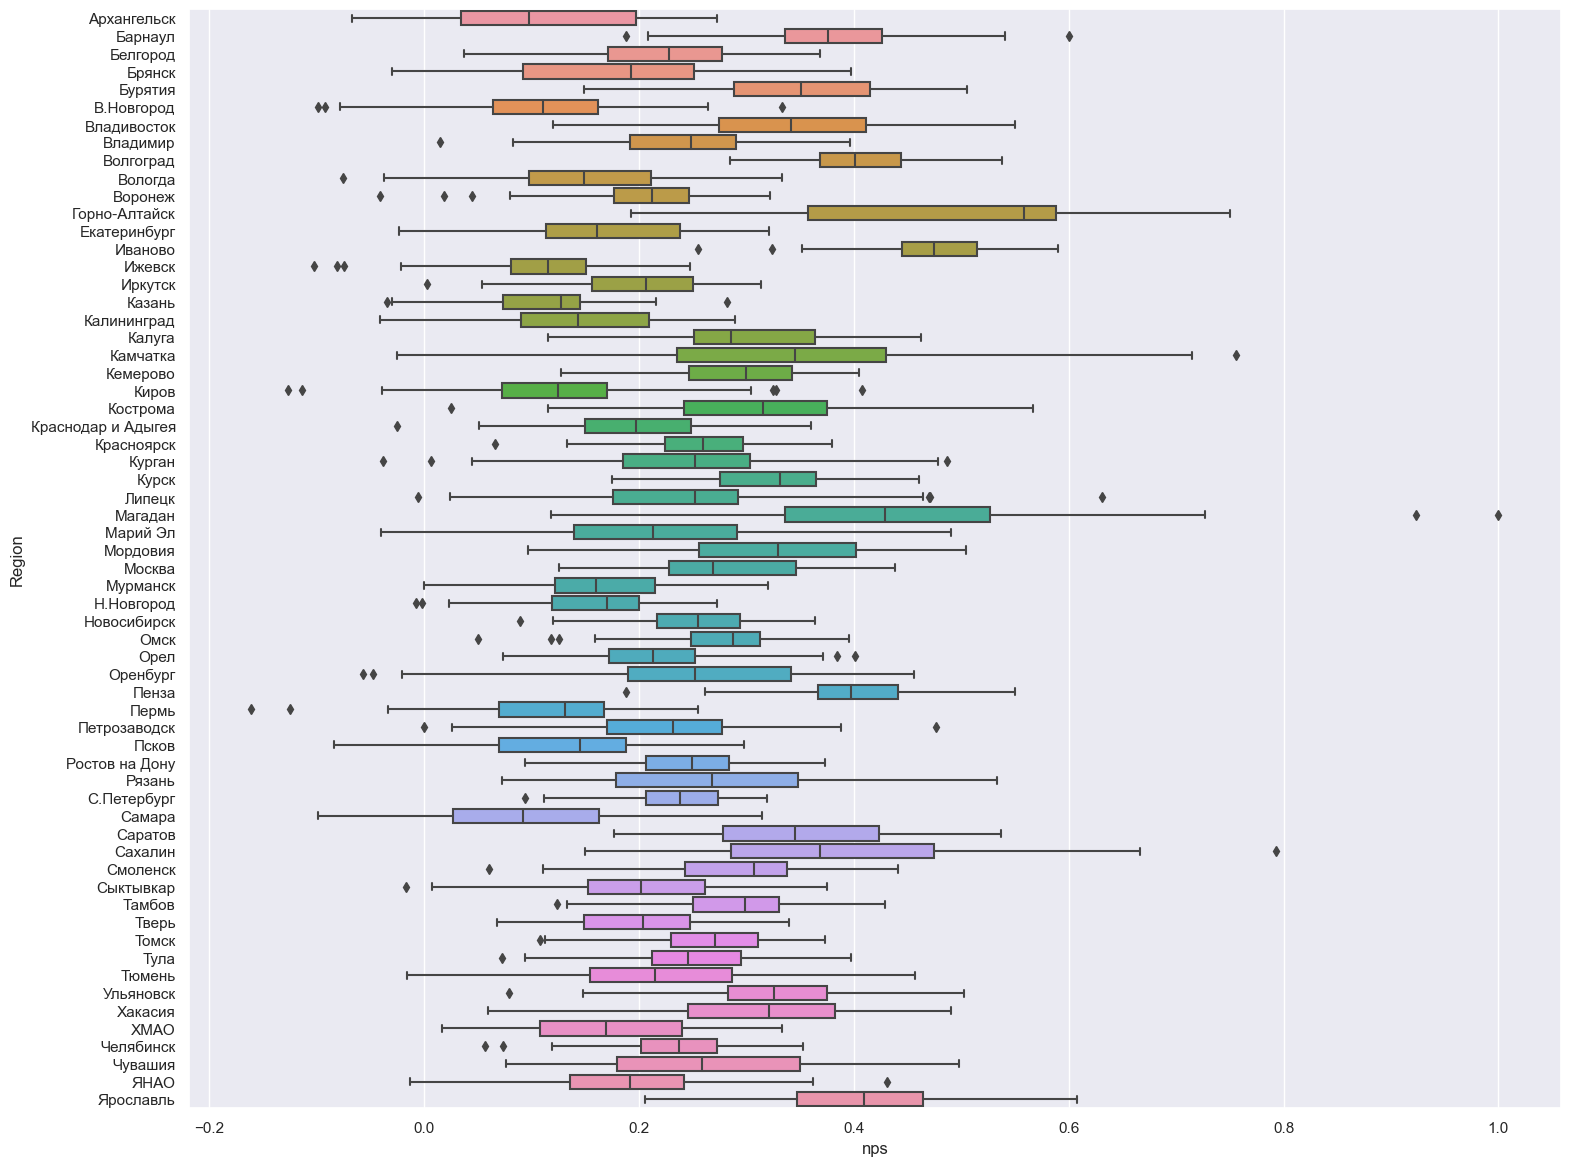

In [114]:
sns.set(rc={'figure.figsize':(17.7,14.27)})
sns.boxplot(data=df, x="nps", y="Region")

In [115]:
#x = df.query('Region == "Белгород"')
def reg_punc(x, region):
    data = x['nps'].values.reshape(1, -1)
    # operate smoothing
    smoother = LowessSmoother(smooth_fraction=0.9, iterations=1)
    smoother.smooth(data)
    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')
    points = smoother.data[0]
    up_points = up[0]
    low_points = low[0]
    t = x.index[0]
    
    for i in range(len(points)-1, 0, -1):
        current_point = points[i]
        current_up = up_points[i]
        current_low = low_points[i]
        if current_point > current_up or current_point < current_low:
            #tm = index(x.iloc[[i]])
            x.loc[t+i,'result'] = current_point
    return x

In [ ]:
total_df_ = pd.DataFrame()
for region in df['Region'].unique().tolist():
    #print(region)
    tmp_df = df[df['Region'] == region]
    #tmp_df.drop('Region', axis= 1 , inplace= True )
    #tmp_df.head()
    region_forecast_df = reg_punc(tmp_df, region)
    total_df_ = pd.concat([total_df_, region_forecast_df])

df_roll = pd.DataFrame()
for reg in total_df_['Region'].unique().tolist():
    tmp = total_df_[total_df_['Region'] == reg]
    tmp['nps_roll'] = tmp['nps']. rolling (3).mean()
    #tmp_df.drop('Region', axis= 1 , inplace= True )
    #tmp_df.head()
    df_roll = pd.concat([df_roll, tmp])
    
df_roll['fin'] = np.where(df_roll['nps']==df_roll['result'], df_roll['nps_roll'], df_roll['nps'])
df_roll

In [120]:
df_roll.to_excel('1сглаживание рядов.xlsx')

In [97]:
# пункт два через квартили
x = df
x['result'] = np.nan 
total_df = pd.DataFrame()
for region in x['Region'].unique().tolist():
    tmp_df = x[x['Region'] == region]
    #tmp_df.drop('Region', axis= 1 , inplace= True )
    #межквартильный 
    Q1 = np.percentile(tmp_df['nps'], 25,interpolation = 'midpoint')
    Q3 = np.percentile(tmp_df['nps'], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Above Upper bound
    upper=Q3+1.5*IQR
    #Below Lower bound
    lower=Q1-1.5*IQR
    for i,row in tmp_df.iterrows():
        if row['nps']>=upper or row['nps']<=lower:
            tmp_df.loc[i,'result'] = tmp_df.loc[i,'nps'] 
    total_df = pd.concat([total_df, tmp_df])

In [ ]:
total_df.sample(60)

черновик

In [ ]:
'''#z - score
z = np.abs(stats.zscore(df['nps']))
threshold = 3
# Position of the outlier
print(np.where(z > 3))
#df.loc[[920]]'''

In [ ]:
#межквартильный 
Q1 = np.percentile(df['nps'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['nps'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['nps']>=upper)
print('Upper Bound:',upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['nps']<=lower)
print('Lower Bound:',lower)
print(lower_array)


In [ ]:


data = df['nps'].values.reshape(1, -1)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

points = smoother.data[0]
up_points = up[0]
low_points = low[0]

for i in range(len(points)-1, 0, -1):
    current_point = points[i]
    current_up = up_points[i]
    current_low = low_points[i]
    if current_point > current_up or current_point < current_low:
        print(f'found an outlier value: {current_point}')

In [ ]:
df_roll = pd.DataFrame()
for reg in df['Region'].unique().tolist():
    print(reg)
    tmp = df[df['Region'] == reg]
    tmp['nps_roll'] = tmp['nps']. rolling (3).mean()
    #tmp_df.drop('Region', axis= 1 , inplace= True )
    #tmp_df.head()
    df_roll = pd.concat([df_roll, tmp])
df_roll